# Michaelis Menten Project Code
# Authors: Michael Johnson and Max Austin
# Created 11/29/2022

In [1]:
# Imports

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Experiment Data

Km = 0.017
Vmax = 0.00358
S0 = 0.002

Schnell-Mendoza equation:

$$[S] = K_m * W\left(\frac{[S]_0}{K_m} \exp{\frac{[S]_0 - V_{max} t}{Km}}\right)$$

In [3]:
# Newton's Method to calculate S

def Newtons_method(Km, Vmax, S0, time, tolerance, initial_guess):

    # Solve Lambert W function
    x = (initial_guess*math.e**initial_guess) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))
    x_step = x - ((x*math.e**x - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))) / (math.e**x+x*math.e**x))
    
    while abs(x_step - x) > tolerance:
        x = x_step
        x_step = x - ((x*math.e**x - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))) / (math.e**x+x*math.e**x))
        
    else:

        # Return Km multiplied by Lambert W
        return Km * x

In [4]:
# Halley's Method to calculate S

def Halleys_method(Km, Vmax, S0, time, tolerance, initial_guess):

    x = (initial_guess*math.e**initial_guess) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))
    x_step = x - (2*((x*math.e**x) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km)))*(math.e**x+x*math.e**x))/(2*(math.e**x+x*math.e**x)**2-(x*math.e**x) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))*(2*math.e**x+x*math.e**x))
    
    while abs(x_step - x) > tolerance:
        x = x_step
        x_step = x - (2*((x*math.e**x) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km)))*(math.e**x+x*math.e**x))/(2*(math.e**x+x*math.e**x)**2-(x*math.e**x) - (S0/Km)*(math.e**((S0 - Vmax*time)/Km))*(2*math.e**x+x*math.e**x))
        
    else:

        # Return Km multiplied by Lambert W
        return Km * x

# Analysis with Halley's Method

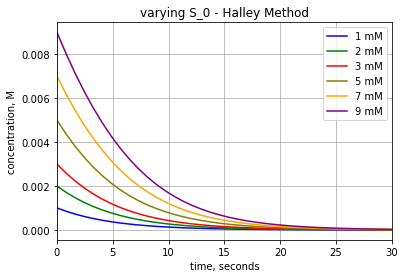

In [5]:
# plotting [S] vs. time for different starting [S]_0 values, predicted by Halley's method

xpace = np.linspace(0, 80, 100)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s7 = []
s9 = []

for i in xpace:
    s1.append(Halleys_method(Km, Vmax, 0.001, i, 1e-10, 0.85))
    s2.append(Halleys_method(Km, Vmax, 0.002, i, 1e-10, 0.85))
    s3.append(Halleys_method(Km, Vmax, 0.003, i, 1e-10, 0.85))
    s4.append(Halleys_method(Km, Vmax, 0.004, i, 1e-10, 0.85))
    s5.append(Halleys_method(Km, Vmax, 0.005, i, 1e-10, 0.85))
    s7.append(Halleys_method(Km, Vmax, 0.007, i, 1e-10, 0.85))
    s9.append(Halleys_method(Km, Vmax, 0.009, i, 1e-10, 0.85))
    
plt.plot(xpace, s1, color='blue', label='1 mM')
plt.plot(xpace, s2, color='green', label='2 mM')
plt.plot(xpace, s3, color='red', label='3 mM')
plt.plot(xpace, s5, color='olive', label='5 mM')
plt.plot(xpace, s7, color='orange', label='7 mM')
plt.plot(xpace, s9, color='purple', label='9 mM')

plt.title('varying S_0 - Halley Method')
plt.ylabel('concentration, M')
plt.xlabel('time, seconds')
plt.xlim([0,30])
plt.grid()
plt.legend()
plt.show()

For numerical experiments to find better $V_{max}$ and $K_M$, use 4mM experimental case: 

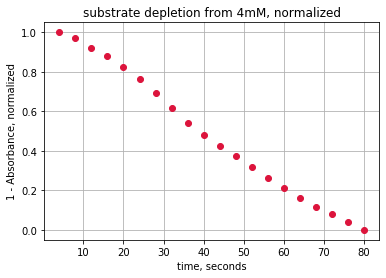

In [6]:
# plotting 4mM case - substrate depletion vs. time based on [1 - absorbance by product (P) chromaphore]

df = pd.read_csv('mm4.csv', header=0)
normalized = df.normalized
seconds = df.seconds
plt.plot(df.seconds, df.normalized, 'o', color='crimson')
plt.title('substrate depletion from 4mM, normalized')
plt.xlabel('time, seconds')
plt.ylabel('1 - Absorbance, normalized')
plt.grid()
plt.show()

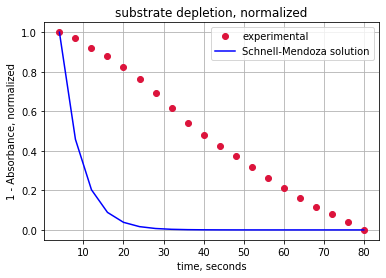

In [7]:
# creating a theoretical 'normalized' substrate depletion plot based on 4mM [S]_0, predicted by Halley's method

s4_df = []

for i in df.seconds:
    s4_df.append(Halleys_method(Km, Vmax, 0.004, i, 1e-10, 0.85))

s4_norm = []
for i in s4_df:
    s4_norm.append((i - min(s4_df)) / (max(s4_df)) - min(s4_df))
    
# plotting this theorectical data on the same plot as above
    
plt.plot(df.seconds, df.normalized, 'o', color='crimson', label='experimental')
plt.plot(df.seconds, s4_norm, color='blue', label='Schnell-Mendoza solution')
plt.title('substrate depletion, normalized')
plt.xlabel('time, seconds')
plt.ylabel('1 - Absorbance, normalized')
plt.grid()
plt.legend()
plt.show()

What this shows, I think, is that the $V_{max}$ and $K_M$ we reported must be drastically overestimating the rate of reaction (the 'theoretical' line, based on our $V_{max}$ and $K_M$ depletes way faster than the experimental data does)

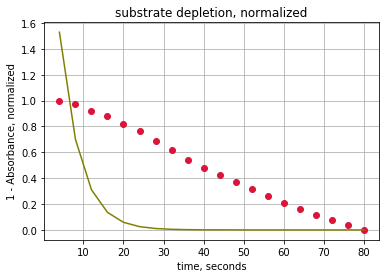

In [8]:
# Attempting to design numerical experiments to find a Vmax and Km that fits the data better

s4_optimize = []

for i in df.seconds:
    s4_optimize.append(Halleys_method(0.0150, 0.00498, 0.004, i, 1e-10, 0.85)) # change Vmax and Km here

s4_opt_norm = []
for i in s4_df:
    s4_opt_norm.append((i - min(s4_optimize)) / (max(s4_optimize)) - min(s4_optimize))
    
# plotting this theorectical data on the same plot as above
    
plt.plot(df.seconds, df.normalized, 'o', color='crimson')
plt.plot(df.seconds, s4_opt_norm, color='olive')
plt.title('substrate depletion, normalized')
plt.xlabel('time, seconds')
plt.ylabel('1 - Absorbance, normalized')
plt.grid()
plt.show()

# Analysis with Newton-Raphson Method

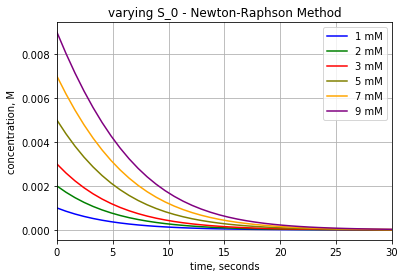

In [9]:
# plotting [S] vs. time for different starting [S]_0 values, predicted by Newton's method

xpace = np.linspace(0, 80, 100)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s7 = []
s9 = []

for i in xpace:
    s1.append(Newtons_method(Km, Vmax, 0.001, i, 1e-10, 0.85))
    s2.append(Newtons_method(Km, Vmax, 0.002, i, 1e-10, 0.85))
    s3.append(Newtons_method(Km, Vmax, 0.003, i, 1e-10, 0.85))
    s4.append(Newtons_method(Km, Vmax, 0.004, i, 1e-10, 0.85))
    s5.append(Newtons_method(Km, Vmax, 0.005, i, 1e-10, 0.85))
    s7.append(Newtons_method(Km, Vmax, 0.007, i, 1e-10, 0.85))
    s9.append(Newtons_method(Km, Vmax, 0.009, i, 1e-10, 0.85))
    
plt.plot(xpace, s1, color='blue', label='1 mM')
plt.plot(xpace, s2, color='green', label='2 mM')
plt.plot(xpace, s3, color='red', label='3 mM')
plt.plot(xpace, s5, color='olive', label='5 mM')
plt.plot(xpace, s7, color='orange', label='7 mM')
plt.plot(xpace, s9, color='purple', label='9 mM')

plt.title('varying S_0 - Newton-Raphson Method')
plt.ylabel('concentration, M')
plt.xlabel('time, seconds')
plt.xlim([0,30])
plt.grid()
plt.legend()
plt.show()

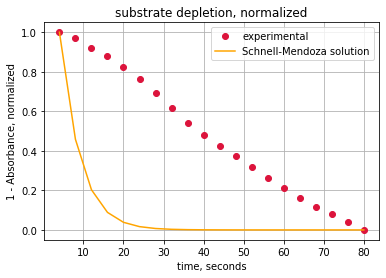

In [11]:
# creating a theoretical 'normalized' substrate depletion plot based on 4mM [S]_0, predicted by Newtons's method

s4_df = []

for i in df.seconds:
    s4_df.append(Newtons_method(Km, Vmax, 0.004, i, 1e-10, 0.85))

s4_norm = []
for i in s4_df:
    s4_norm.append((i - min(s4_df)) / (max(s4_df)) - min(s4_df))
    
# plotting this theorectical data on the same plot as above
    
plt.plot(df.seconds, df.normalized, 'o', color='crimson', label='experimental')
plt.plot(df.seconds, s4_norm, color='orange', label='Schnell-Mendoza solution')
plt.title('substrate depletion, normalized')
plt.xlabel('time, seconds')
plt.ylabel('1 - Absorbance, normalized')
plt.grid()
plt.legend()
plt.show()